# 分析接受阈值对 Target Forward 次数和 Token 吞吐量的影响

本 Notebook 用于分析和可视化接受阈值 (Acceptance Threshold) 对模型推理过程中 Target Forward 次数以及最终 Token 吞吐量的影响。数据来源于 `experiment_summary_20251212_201805.json`。

In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# 设置绘图风格
sns.set_theme(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [ ]:
# 读取数据
file_path = "experiment_summary_20251214_101319.json"

data = []
if os.path.exists(file_path):
    with open(file_path, 'r') as f:
        raw_data = json.load(f)
        
    for entry in raw_data:
        # 提取需要的字段
        # 注意：根据之前的分析，threshold 在 config 中名为 'small_draft_threshold'
        # 结果在 result 中
        if 'config' in entry and 'result' in entry:
            threshold = entry['config'].get('small_draft_threshold')
            target_forward = entry['result'].get('target_forward_times')
            throughput = entry['result'].get('throughput')
            
            if threshold is not None and target_forward is not None and throughput is not None:
                data.append({
                    'Acceptance Threshold': threshold,
                    'Target Forward Times': target_forward,
                    'Token Throughput': throughput
                })

# 创建 DataFrame
df = pd.DataFrame(data)

# 按阈值分组并计算均值（如果有多次实验对应同一阈值）
df_grouped = df.groupby('Acceptance Threshold').mean().reset_index()

print(f"加载了 {len(df)} 条数据记录")
print("分组后的数据预览：")
print(df_grouped.head())

加载了 49 条数据记录
分组后的数据预览：
   Acceptance Threshold  Target Forward Times  Token Throughput
0                   0.1                4748.0         25.535902
1                   0.2                4748.0         25.469132
2                   0.3                4748.0         25.200261
3                   0.4                4748.0         25.027250
4                   0.5                4748.0         25.796095


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

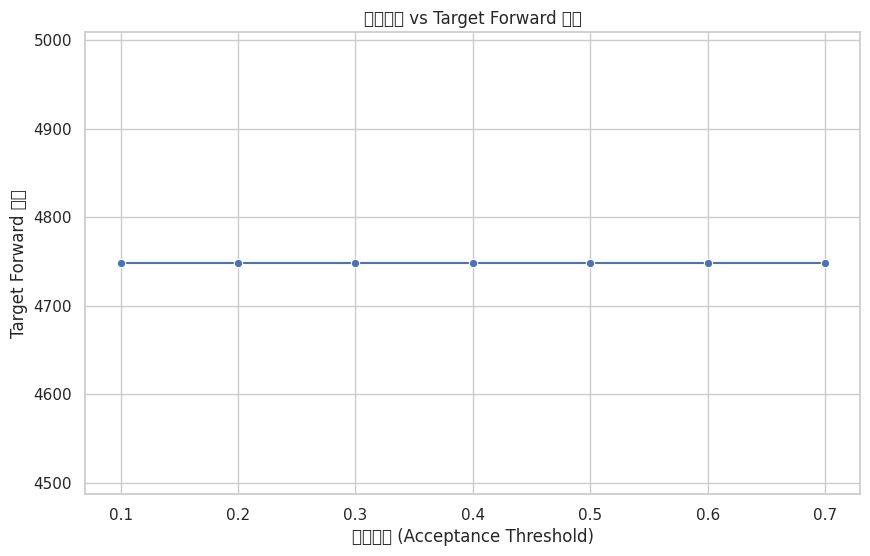

In [ ]:
# Plot Acceptance Threshold vs Target Forward Times
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='Acceptance Threshold', y='Target Forward Times', marker='o')
plt.title('Acceptance Threshold vs Target Forward Times')
plt.xlabel('Acceptance Threshold')
plt.ylabel('Target Forward Times')
plt.grid(True)
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

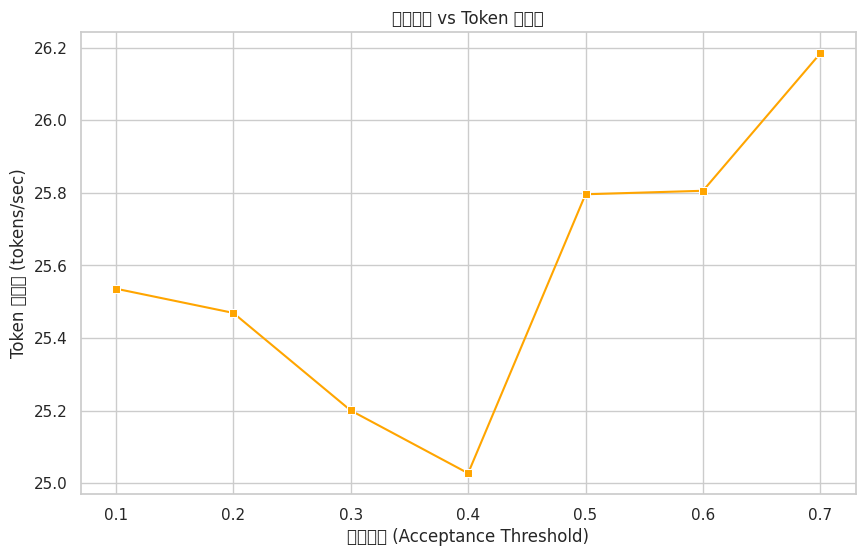

In [ ]:
# Plot Acceptance Threshold vs Token Throughput
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='Acceptance Threshold', y='Token Throughput', marker='s', color='orange')
plt.title('Acceptance Threshold vs Token Throughput')
plt.xlabel('Acceptance Threshold')
plt.ylabel('Token Throughput (tokens/sec)')
plt.grid(True)
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

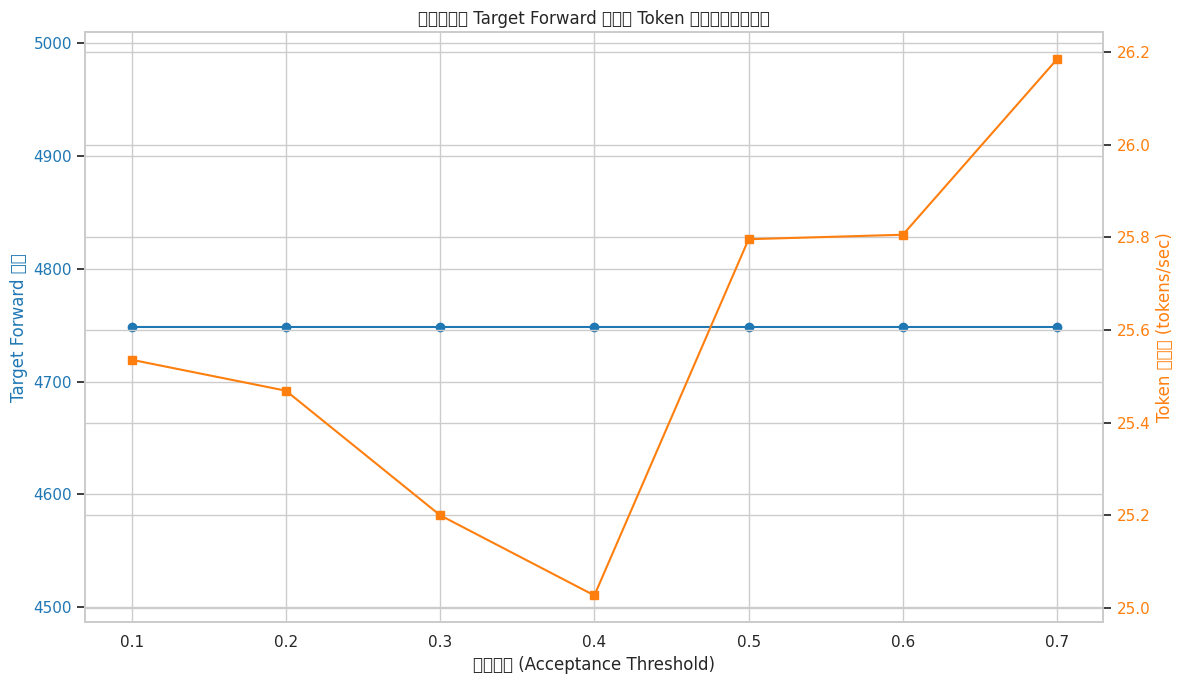

In [ ]:
# Plot Dual Axis Comparison
fig, ax1 = plt.subplots(figsize=(12, 7))

color = 'tab:blue'
ax1.set_xlabel('Acceptance Threshold')
ax1.set_ylabel('Target Forward Times', color=color)
ax1.plot(df_grouped['Acceptance Threshold'], df_grouped['Target Forward Times'], color=color, marker='o', label='Target Forward Times')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Token Throughput (tokens/sec)', color=color)
ax2.plot(df_grouped['Acceptance Threshold'], df_grouped['Token Throughput'], color=color, marker='s', label='Token Throughput')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Impact of Acceptance Threshold on Target Forward Times and Token Throughput')
fig.tight_layout()  # Adjust layout to prevent label overlap
plt.show()